## **EDA for Categorical Data**

In this notebook, we perform Exploratory Data Analysis (EDA) for the categorical variables.

In [70]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [71]:
csv_data = pd.read_csv("datasets\\cleaned-data.csv")

In [72]:
numeric_data = pd.DataFrame(csv_data[['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']])
cat_data = pd.DataFrame(csv_data[['Survived', 'Pclass', 'Sex', 'Embarked', 'Alone']])

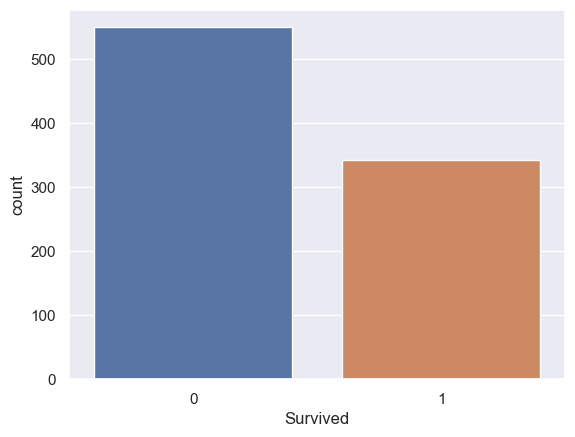

Survived: 342
Dead: 549
Survived %: 38.38
Dead %: 61.62
Ratio Survive:Dead 342:549


In [73]:
sb.countplot(x ='Survived', data=csv_data)
plt.show()
survived_count = csv_data['Survived'].sum()
dead_count = csv_data['Survived'].count() - survived_count
print(f"Survived: {survived_count}\nDead: {dead_count}\nSurvived %: {(survived_count/csv_data['Survived'].count() * 100):.2f}\nDead %: {(100 - (survived_count/csv_data['Survived'].count() * 100)):.2f}")
print(f"Ratio Survive:Dead {survived_count}:{dead_count}")

As we can see from the EDA of Survived, unfortunately majority of the passengers did not survive. With only 342 out of 891 passengers surviving resulting in the survival rate of 38.38%

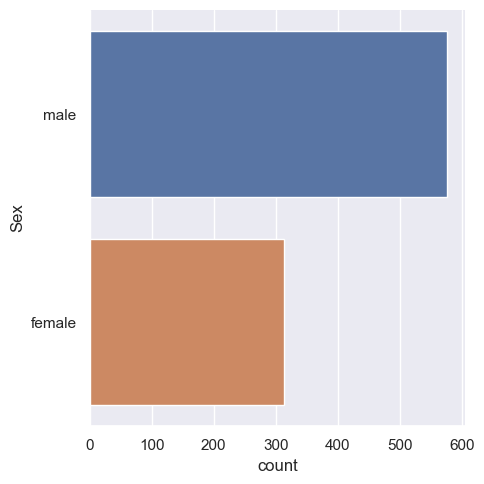

In [74]:
sb.catplot(y= 'Sex', data = cat_data, kind = "count")

In [75]:
malecount = csv_data[csv_data['Sex'] == 'male'].count()
femalecount = csv_data[csv_data['Sex'] == 'female'].count()
print(f"Male: {malecount['Sex']}, percent: {((malecount['Sex']/(malecount['Sex']+femalecount['Sex']))*100):.2f}%")
print(f"Female: {femalecount['Sex']}, percent: {((femalecount['Sex']/(malecount['Sex']+femalecount['Sex']))*100):.2f}%")


Male: 577, percent: 64.76%
Female: 314, percent: 35.24%


We can see that majority of the passengers are Male accounting for 64.76% of the data and Female account for 35.24% of the total data.

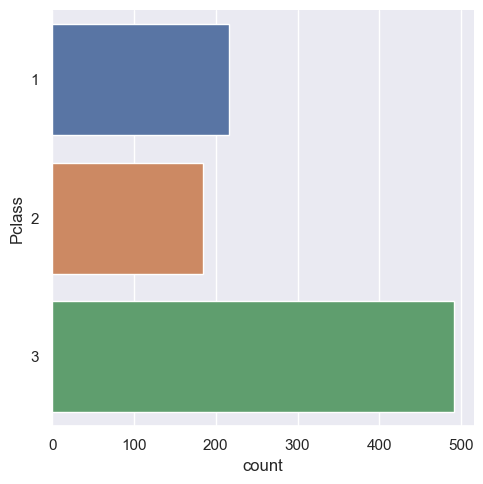

In [76]:
sb.catplot(y= 'Pclass', data = cat_data, kind = "count")

In [77]:
class_1 = csv_data[csv_data['Pclass'] == 1].count()
class_2 = csv_data[csv_data['Pclass'] == 2].count()
class_3 = csv_data[csv_data['Pclass'] == 3].count()
print(f"class 1: {class_1['Pclass']}, percent: {((class_1['Pclass']/(class_1['Pclass']+class_2['Pclass']+class_3['Pclass']))*100):.2f}%")
print(f"class 2: {class_2['Pclass']}, percent: {((class_2['Pclass']/(class_1['Pclass']+class_2['Pclass']+class_3['Pclass']))*100):.2f}%")
print(f"class 3: {class_3['Pclass']}, percent: {((class_3['Pclass']/(class_1['Pclass']+class_2['Pclass']+class_3['Pclass']))*100):.2f}%")


class 1: 216, percent: 24.24%
class 2: 184, percent: 20.65%
class 3: 491, percent: 55.11%


We can see that majority of the people are in class 3 which is the lowest class out of all the different classes. Class 3 accounts for 55.11% of all data.

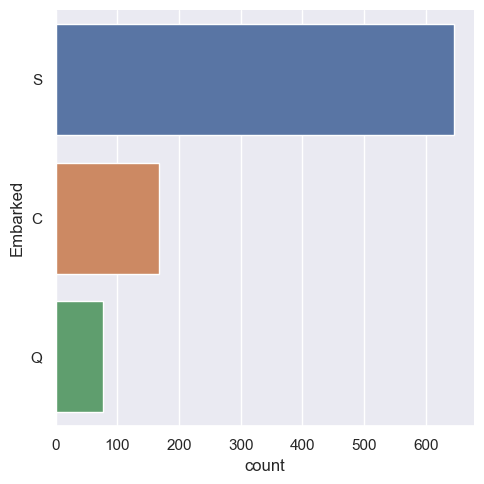

In [78]:
sb.catplot(y= 'Embarked', data = cat_data, kind = "count")

In [79]:
class_1 = csv_data[csv_data['Embarked'] == 'S'].count()
class_2 = csv_data[csv_data['Embarked'] == 'C'].count()
class_3 = csv_data[csv_data['Embarked'] == 'Q'].count()
print(f"Embarked at S: {class_1['Embarked']}, percent: {((class_1['Embarked']/(class_1['Embarked']+class_2['Embarked']+class_3['Embarked']))*100):.2f}%")
print(f"Embarked at C: {class_2['Embarked']}, percent: {((class_2['Embarked']/(class_1['Embarked']+class_2['Embarked']+class_3['Embarked']))*100):.2f}%")
print(f"Embarked at Q: {class_3['Embarked']}, percent: {((class_3['Embarked']/(class_1['Embarked']+class_2['Embarked']+class_3['Embarked']))*100):.2f}%")


Embarked at S: 646, percent: 72.50%
Embarked at C: 168, percent: 18.86%
Embarked at Q: 77, percent: 8.64%


Majority of the passengers embarked at Southampton, accounting for 72.50% of the entire data

## **Relationship with Survived**

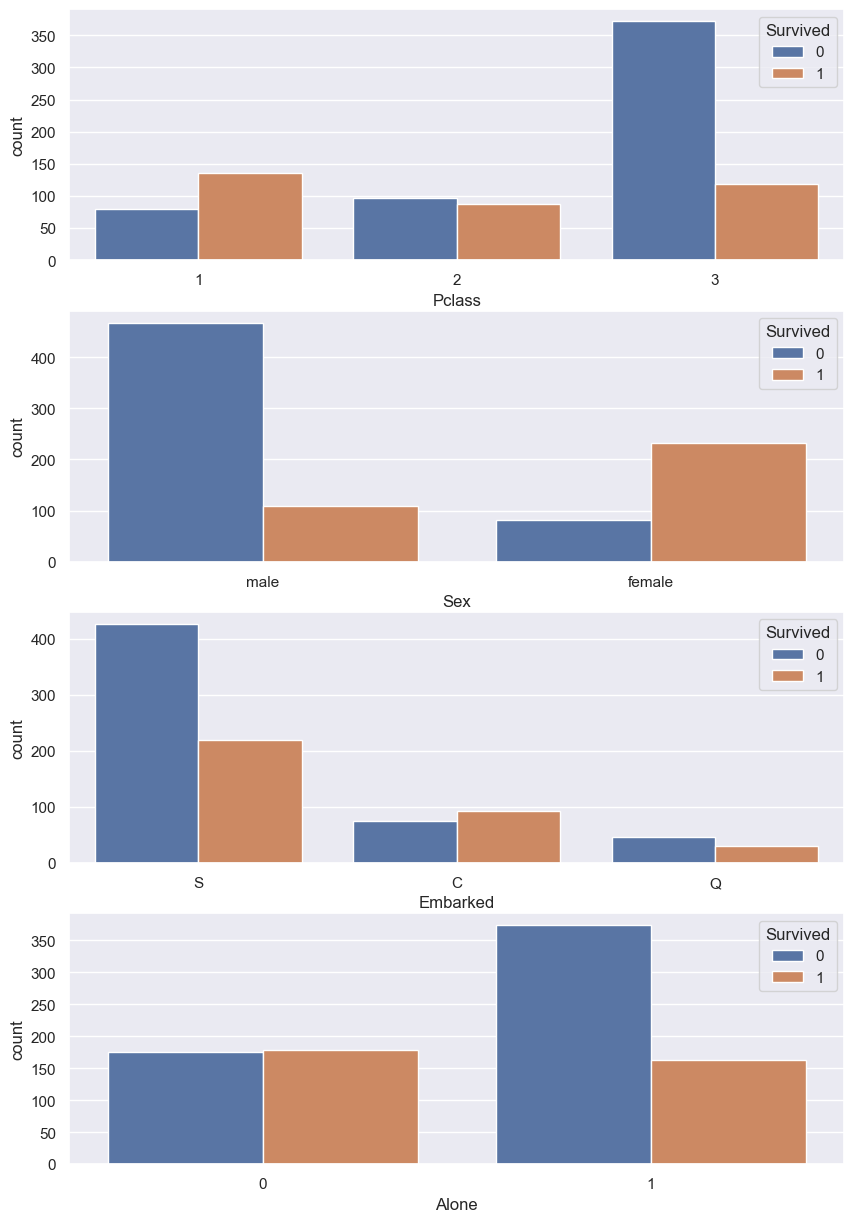

In [80]:
f, axes = plt.subplots(4, 1, figsize=(10, 15))
num = 0
for i in cat_data:
    if i == 'Survived':
        continue
    sb.countplot(x = i, hue='Survived', data=cat_data, ax=axes[num])
    num+=1

The data gathered is actually interesting. The following is our analysis for the different variables above 

Pclass: It can be seen clearly that passengers in class 1 are given higher priority during rescue as majority of the passengers in class 1 survived. On the other hand majority of the people in class 3 did not manage to survive.

Sex: This variable show us that there the gender did play a critical role here to determine who survive. Majority of the male passenger did not survive while majority of the female passengers survived

Embarked: We can see that the place that the passengers embarked on also plays a significant role in prediciting. Majority of the passengers that boarded the ship at Cherbourg survived while majority of the passengers that boarded at Southampton did not.

Alone: Majority of the passengers that are travelling alone unfortunately did not manage to survive

The graph below are the detailed breakdown for each of variable


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

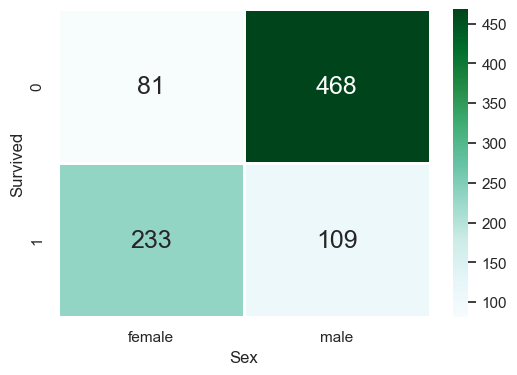

In [81]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(csv_data.groupby(['Survived', 'Sex']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [82]:
Sex_M = csv_data[csv_data['Sex'] == 'male']
Sex_M_count = Sex_M.count()
Sex_M_survived =Sex_M[Sex_M['Survived'] == 1].count()


Sex_F = csv_data[csv_data['Sex'] == 'female']
Sex_F_count = Sex_F.count()
Sex_F_survived =Sex_F[Sex_F['Survived'] == 1].count()

Sex_M_percent = (Sex_M_survived/Sex_M_count)*100
Sex_F_percent = (Sex_F_survived/Sex_F_count)*100
print(f"Male survival percentage: {Sex_M_percent['Survived']}")
print(f"Female survival percentage: {Sex_F_percent['Survived']}")

Male survival percentage: 18.890814558058924
Female survival percentage: 74.20382165605095


As we can see from the data above, the survival percentage for male is around 18.89% while the survival rate for female on the other hand is 74.20%. With the significant difference, `Sex` would be a crucial factor to determine the survivability of an individual.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

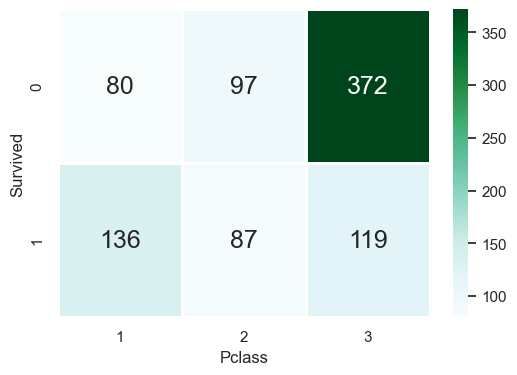

In [83]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(csv_data.groupby(['Survived', 'Pclass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [84]:
class_1 = csv_data[csv_data['Pclass'] == 1]
class_1_count = csv_data[csv_data['Pclass'] == 1].count()
class_1_survived =class_1[class_1['Survived'] == 1].count()


class_2 = csv_data[csv_data['Pclass'] == 2]
class_2_count = csv_data[csv_data['Pclass'] == 2].count()
class_2_survived =class_2[class_2['Survived'] == 1].count()


class_3 = csv_data[csv_data['Pclass'] == 3]
class_3_count = csv_data[csv_data['Pclass'] == 3].count()
class_3_survived =class_3[class_3['Survived'] == 1].count()


class_1_percent = (class_1_survived/class_1_count)*100
class_2_percent = (class_2_survived/class_2_count)*100
class_3_percent = (class_3_survived/class_3_count)*100
print(f"Class 1 survival percentage: {class_1_percent['Survived']}")
print(f"Class 2 survival percentage: {class_2_percent['Survived']}")
print(f"Class 3 survival percentage: {class_3_percent['Survived']}")

Class 1 survival percentage: 62.96296296296296
Class 2 survival percentage: 47.28260869565217
Class 3 survival percentage: 24.236252545824847


As we can see from the data above, the survival percentage for class 1 is 62.96%, the survival percentage for class 2 is 47.28% and the survival percentage for class 3 is 24.23%. We can see that passengers who are at a higher passenger class have a higher survival rate compared to passengers at a lower passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='survivability'>

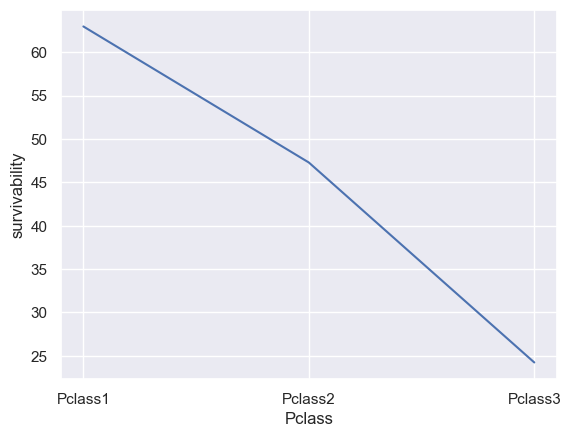

In [85]:
amounts = [['Pclass1',class_1_percent["Survived"]], ['Pclass2',class_2_percent["Survived"]], ['Pclass3',class_3_percent["Survived"]]]
df = pd.DataFrame(amounts, columns=['Pclass', 'survivability'])
sb.lineplot(x ='Pclass', y ='survivability', data = df)

As we can see from the line graph above, the survivability of the passenger drop signifcantly as the passenger class go lower. Therefore `Pclass` would be an important variable in our prediction.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

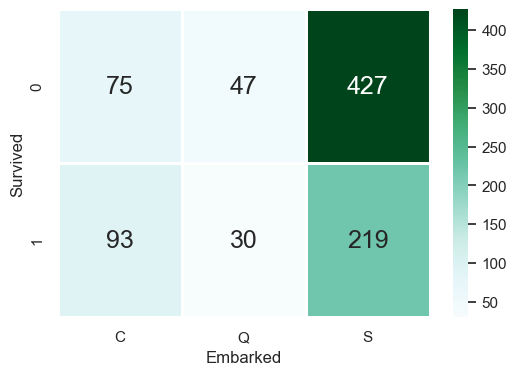

In [86]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(csv_data.groupby(['Survived', 'Embarked']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [87]:
class_c = csv_data[csv_data['Embarked'] == 'C']
class_c_count = class_c.count()
class_c_survived =class_c[class_c['Survived'] == 1].count()


class_q = csv_data[csv_data['Embarked'] == 'Q']
class_q_count = class_q.count()
class_q_survived =class_q[class_q['Survived'] == 1].count()


class_s = csv_data[csv_data['Embarked'] == 'S']
class_s_count = class_s.count()
class_s_survived =class_s[class_s['Survived'] == 1].count()


class_c_percent = (class_c_survived/class_c_count)*100
class_q_percent = (class_q_survived/class_q_count)*100
class_s_percent = (class_s_survived/class_s_count)*100
print(f"Embarked at Cherbourg survival rate: {class_c_percent['Survived']}")
print(f"Embarked at Queenstown survival rate: {class_q_percent['Survived']}")
print(f"Embarked at Southampton survival rate: {class_s_percent['Survived']}")


Embarked at Cherbourg survival rate: 55.35714285714286
Embarked at Queenstown survival rate: 38.961038961038966
Embarked at Southampton survival rate: 33.90092879256966


We can see that there is a siginificant difference between the survivabilty of passengers that boarded at Cherbourg and other places. Hence the varaible `Embarked` could make a difference in our predicition.

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

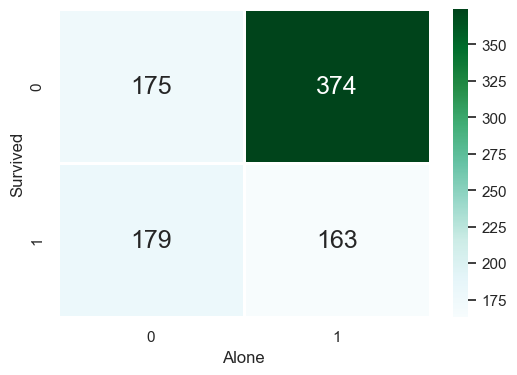

In [88]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(csv_data.groupby(['Survived', 'Alone']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [89]:
class_alone = csv_data[csv_data['Alone'] == 1]
class_alone_count = class_alone.count()
class_alone_survived =class_alone[class_alone['Survived'] == 1].count()


class_not_alone = csv_data[csv_data['Alone'] == 0]
class_not_alone_count = class_not_alone.count()
class_not_alone_survived =class_not_alone[class_not_alone['Survived'] == 1].count()

class_alone_percent = (class_alone_survived/class_alone_count)*100
class_not_alone_percent = (class_not_alone_survived/class_not_alone_count)*100

print(f"Survival rate of people travelling alone: {class_alone_percent['Survived']}")
print(f"Survival rate of people not travelling alone: {class_not_alone_percent['Survived']}")

Survival rate of people travelling alone: 30.353817504655495
Survival rate of people not travelling alone: 50.56497175141242


From the heatmap, we can observed if the passenger is alone, the survival rate is less, thus `Alone` is an important predictor.

In [90]:
pd.crosstab([csv_data.Initial],csv_data.Survived,margins=True)

Survived,0,1,All
Initial,,,
Capt,1,0,1
Col,1,1,2
Countess,0,1,1
Don,1,0,1
Dr,4,3,7
Jonkheer,1,0,1
Lady,0,1,1
Major,1,1,2
Master,17,23,40


The above data show that the title of an individual does not have a significant impact on the survivability of the an individual

As such, from the categorical variables, we have deduced the variables that would be predictors for machine learning which are: `Sex`, `Pclass`, `Embarked` and `Alone`.

In [91]:
cat_predictors = csv_data[['Sex', 'Pclass', 'Embarked', 'Alone', 'Survived']]
cat_predictors.head()

,Sex,Pclass,Embarked,Alone,Survived
0,male,3,S,0,0
1,female,1,C,0,1
2,female,3,S,1,1
3,female,1,S,0,1
4,male,3,S,1,0


In [92]:
cat_predictors.to_csv("datasets\\categorical-predictors.csv")

The dataframe containing only categorical predictors and the response variable `Survived` has been exported to the `categorical-predictors.csv` in the `datasets` folder.